C:\Users\User\AppData\Local\Temp\ipykernel_15668\178286970.py:31: RuntimeWarning: divide by zero encountered in log10
  ax.plot_surface(T, F, 10 * np.log10(spec), cmap='viridis')
C:\Users\User\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


Spectrogram generated and saved for 03-01-01-01-01-01-01_resampled.wav
Spectrogram generated and saved for 03-01-01-01-01-02-01_resampled.wav
Spectrogram generated and saved for 03-01-01-01-02-01-01_resampled.wav
Spectrogram generated and saved for 03-01-01-01-02-02-01_resampled.wav
Spectrogram generated and saved for 03-01-02-01-01-01-01_resampled.wav
Spectrogram generated and saved for 03-01-02-01-01-02-01_resampled.wav
Spectrogram generated and saved for 03-01-02-01-02-01-01_resampled.wav
Spectrogram generated and saved for 03-01-02-01-02-02-01_resampled.wav
Spectrogram generated and saved for 03-01-02-02-01-01-01_resampled.wav
Spectrogram generated and saved for 03-01-02-02-01-02-01_resampled.wav
Spectrogram generated and saved for 03-01-02-02-02-01-01_resampled.wav
Spectrogram generated and saved for 03-01-02-02-02-02-01_resampled.wav
Spectrogram generated and saved for 03-01-03-01-01-01-01_resampled.wav
Spectrogram generated and saved for 03-01-03-01-01-02-01_resampled.wav
Spectr

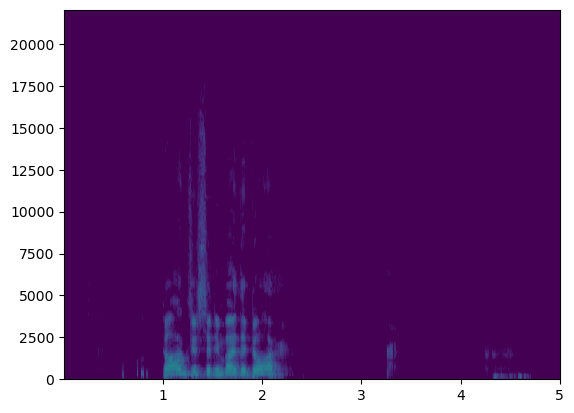

In [4]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to generate 3D spectrogram
def generate_3d_spectrogram(audio_folder_path, output_folder_path, time_steps=300):
    # Get a list of all the audio file names in the folder
    file_list = os.listdir(audio_folder_path)

    # Sort the file names to ensure consistent order
    file_list.sort()

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Iterate over the audio files
    for file_name in file_list:
        # Load the audio file and convert it to mono (if stereo)
        audio_path = os.path.join(audio_folder_path, file_name)
        audio, sr = librosa.load(audio_path, sr=None, mono=True)

        # Generate the 3D spectrogram
        spec, freqs, t, im = plt.specgram(audio, Fs=sr, scale='dB', vmin=-100, vmax=0)

        # Plot 3D spectrogram
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        T, F = np.meshgrid(t, freqs)
        ax.plot_surface(T, F, 10 * np.log10(spec), cmap='viridis')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequencies (Hz)')
        ax.set_zlabel('Amplitude (dB)')
        ax.set_title(f'Spectrogram for {file_name}', loc='center', wrap=True)

        # Save the 3D spectrogram plot as an image
        output_file_name = f'{file_name.split(".")[0]}_3d_spectrogram.png'
        output_file_path = os.path.join(output_folder_path, output_file_name)
        plt.savefig(output_file_path)
        plt.close()

        print(f"Spectrogram generated and saved for {file_name}")

# Example usage:
audio_folder_path = 'D:/Actor_01_Resampled_Audio'
output_folder_path = 'D:/3d_spectrogram'
generate_3d_spectrogram(audio_folder_path, output_folder_path)
